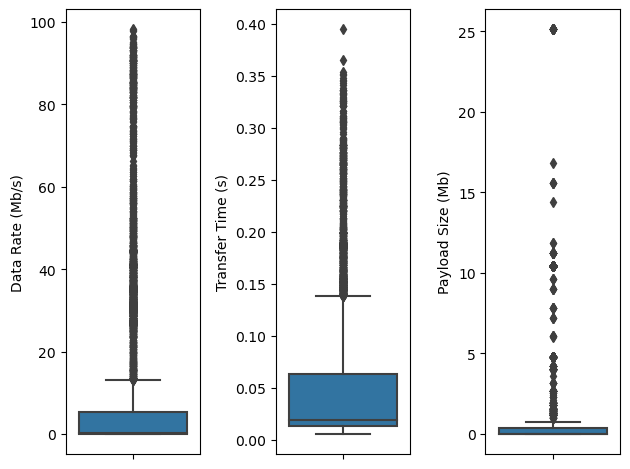

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('30110_log_server.txt', index_col=0)
df = df.join(pd.read_csv('30110_log_client.txt',  index_col=0))
df = df.rename(dict(size='payload_size'), axis=1)
df['payload_size'] = df['payload_size'] * 1e-6
df['duration'] = df.end - df.start
df['rate'] = (df.payload_size / df.duration) 


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax = sns.boxplot(df, y='rate', ax=ax1)
ax.set_ylabel('Data Rate (Mb/s)')

ax = sns.boxplot(df, y='duration', ax=ax2)
ax.set_ylabel('Transfer Time (s)')
plt.tight_layout()

ax = sns.boxplot(df, y='payload_size', ax=ax3)
ax.set_ylabel('Payload Size (Mb)')
plt.tight_layout()